In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


d0 = pd.read_csv(r'D:\corona\MNIST\train.csv')
print(d0.head(5))                  # First 5 rows of d0

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
# save the labels into a vairable 1

l = d0['label']

# Drop the label feature and store the pixel data in d

d = d0.drop("label", axis=1)

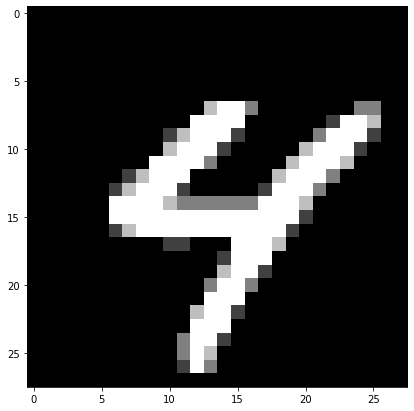

4


In [3]:
# display or plot a number
plt.figure(figsize=(7,7))
idx = 250

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

In [4]:
labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data=", data.shape)

The shape of sample data= (15000, 784)


In [5]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit_transform(data)

scale.shape

(15000, 784)

In [6]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15k points
data_1000 =  scale[0:1000,:]
labels_1000 = labels[0:1000]

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


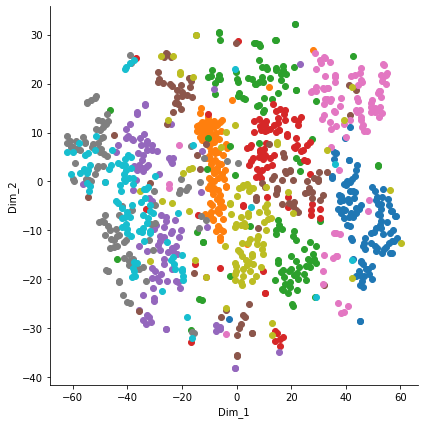

In [8]:
model = TSNE(n_components=2, random_state=0)
# configuring the parameters
# the number of components = 2
# defalut perplexity = 30
# default learning rate = 200
# default Maximum num of iteration for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","label"))

# ploting the result of tsne
import seaborn as sns
sns.FacetGrid(tsne_df, hue='label',size=6).map(plt.scatter, "Dim_1","Dim_2")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


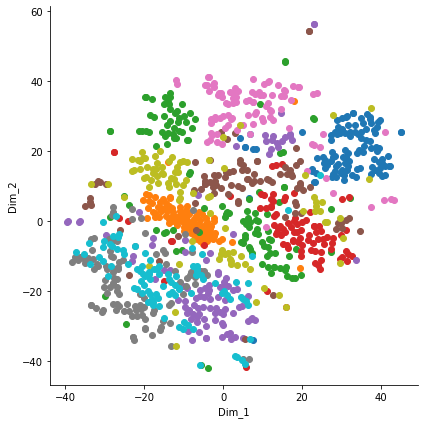

In [9]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","label"))

# ploting the result of tsne
import seaborn as sns
sns.FacetGrid(tsne_df, hue='label',size=6).map(plt.scatter, "Dim_1","Dim_2")
plt.show()